In [ ]:
import cv2
from google.colab.patches import cv2_imshow     # Google Colab doesn't support cv2.imshow() so we import this and use cv2_imshow()
import numpy as np

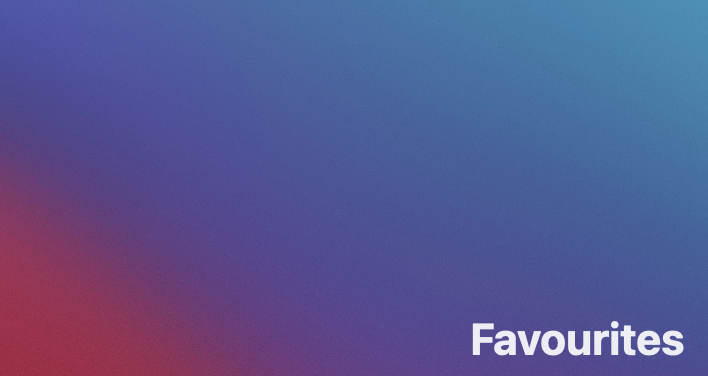

In [ ]:
# Reading an image
img = cv2.imread('/content/Screenshot 2021-02-05 at 8.14.44 PM.png')
# Showing an image
cv2_imshow(img)                                 # cv2.imshow('Image', img) is the syntax where 'Image' is the file name thus opened.
# cv2.waitkey(0)                                # for IDE use so that the file will open indefinitly

In [ ]:
# Reading an video
capture = cv2.VideoCapture('/content/Electronics - 2314.mp4')                   # 0 for webcam, 1 for 1st camera and so on... can also give video path

# Showing an video
while True:
  isTrue, frame = capture.read()
  cv2_imshow(frame)
  if cv2.waitKey(20) & 0xFF==ord('d'):
    break

# capture.release()
# cv2.destroyAllWindows()

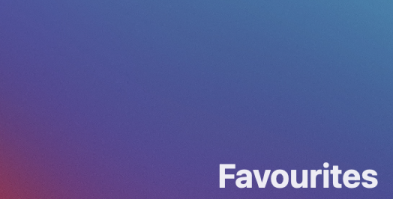

In [ ]:
## Resizing / Rescaling (Works for Image, video and Live Video from WebCam)
def resizeImage(image, scale = 0.75):
  width = int(image.shape[1] * scale)
  height = int(image.shape[0] * scale)
  dimensions = (width,height)
  return cv2.resize(image, dimensions, interpolation = cv2.INTER_AREA)

img = cv2.imread('/content/Screenshot 2021-02-05 at 8.14.34 PM.png')
image_resized = resizeImage(img)
cv2_imshow(image_resized)

In [ ]:
## Resizing / Rescaling (Works for Live Video from WebCam)                       # I have to review this code 
def changeRes(width,height,brightness):
  capture.set(3, width)
  capture.set(4, height)
  capture.set(10, brightness)                                                   # I haven't tried it yet

capture = cv2.VideoCapture(0)
while True:
  isTrue, frame = capture.read()
  cv2_imshow(frame)
  if cv2.waitKey(20) & 0xFF==ord('d'):
    break

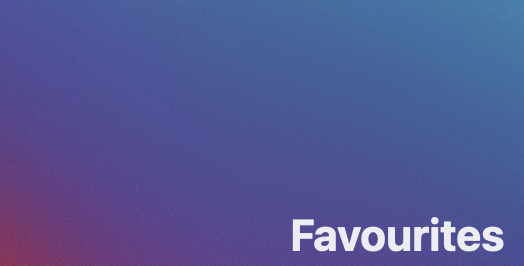

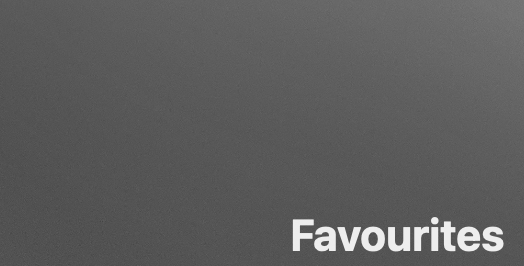

In [ ]:
## Same basic functions in OpenCV
# 1.) BGR to Gray Scale
img = cv2.imread('/content/Screenshot 2021-02-05 at 8.14.34 PM.png')
cv2_imshow(img) 
Gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(Gray)

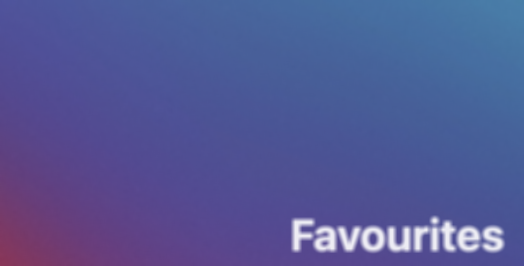

In [ ]:
# Gaussian Blur
blur = cv2.GaussianBlur(img, (5,5), cv2.BORDER_DEFAULT)
cv2_imshow(blur)

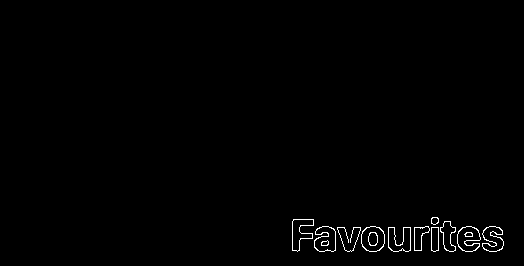

In [ ]:
# Edge cascade
canny = cv2.Canny(img, 407, 407)
cv2_imshow(canny)

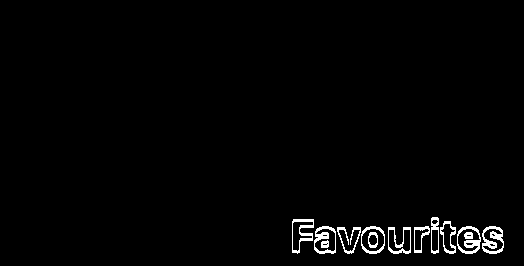

In [ ]:
# Dilating the Image
dilated = cv2.dilate(canny, (7,7), iterations = 2)
cv2_imshow(dilated)

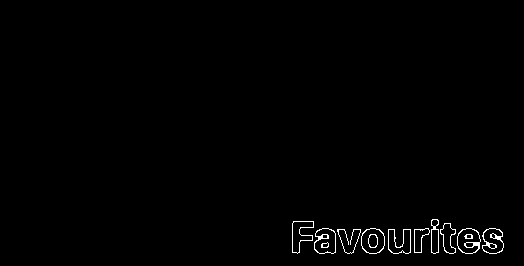

In [ ]:
# Eroding the Image
eroded = cv2.erode(dilated, (7,7), iterations = 2)
cv2_imshow(eroded)

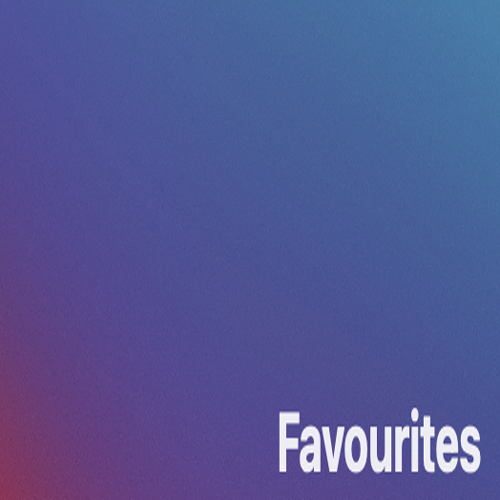

In [ ]:
# Resizing the Image
resized = cv2.resize(img, (500,500), interpolation = cv2.INTER_CUBIC)
cv2_imshow(resized)

In [ ]:
# Cropping the Image
cropped = img[100:200,200:1000]
cv2_imshow(cropped)

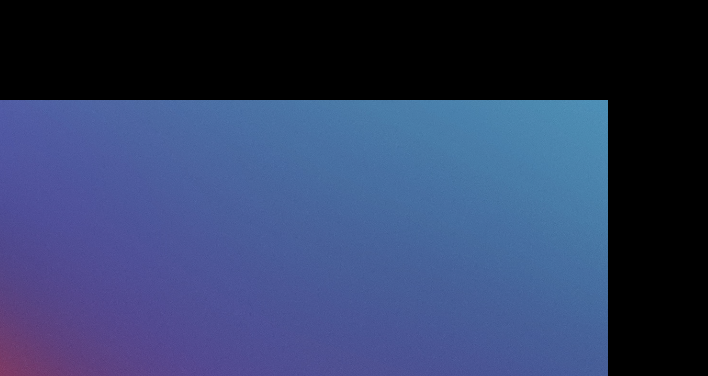

In [ ]:
## Image Transformations                                                        # -x = Left
# Translation                                                                   # -y = Top
def Translate(img, x, y):                                                       # x = Right 
  transMat = np.float32([[1,0,x],[0,1,y]])                                      # y = Down
  dimensions = (img.shape[1], img.shape[0])
  return cv2.warpAffine(img, transMat, dimensions)

translated = Translate(img, -100, 100)  
cv2_imshow(translated)